In [1]:
import matplotlib.pyplot as plt
from numpy import loadtxt
import numpy as np
import pandas as pd
from matplotlib import style
style.use('fivethirtyeight')

%matplotlib inline

In [49]:
# 1. Download sunspot dataset and upload the same to dataset directory
#    Load the sunspot dataset as an Array
#!mkdir -p dataset
#!wget -c -b http://www-personal.umich.edu/~mejn/cp/data/sunspots.txt -P dataset
data = loadtxt("dataset/sunspots.txt", float)

'''
import matplotlib.dates as mdates

def convert_date(date_bytes):
    return mdates.strpdate2num('%m/%d/%y')(date_bytes.decode('ascii'))

data = loadtxt("dataset/webTraffic.csv", delimiter=',', skiprows=1, converters={0: convert_date})
'''

# 2. View the data as a table
data_frame = pd.DataFrame(data, columns=['Months', 'SunSpots'])
data_frame.describe()

,Months,SunSpots
count,3143.000000,3143.000000
mean,1571.000000,51.924499
std,907.450274,44.322387
min,0.000000,0.000000
25%,785.500000,15.450000
50%,1571.000000,41.500000
75%,2356.500000,76.500000
max,3142.000000,253.800000


In [93]:
df = pd.DataFrame(data_frame.SunSpots[:1500])

df['MA_10'] = df.SunSpots.rolling(10).mean()
df['SD_10'] = df.SunSpots.rolling(10).std()

df.head(15)

,SunSpots,MA_10,SD_10
0,58.0,NaN,NaN
1,62.6,NaN,NaN
2,70.0,NaN,NaN
3,55.7,NaN,NaN
4,85.0,NaN,NaN
5,83.5,NaN,NaN
6,94.8,NaN,NaN
7,66.3,NaN,NaN
8,75.9,NaN,NaN
9,75.5,72.73,12.604060


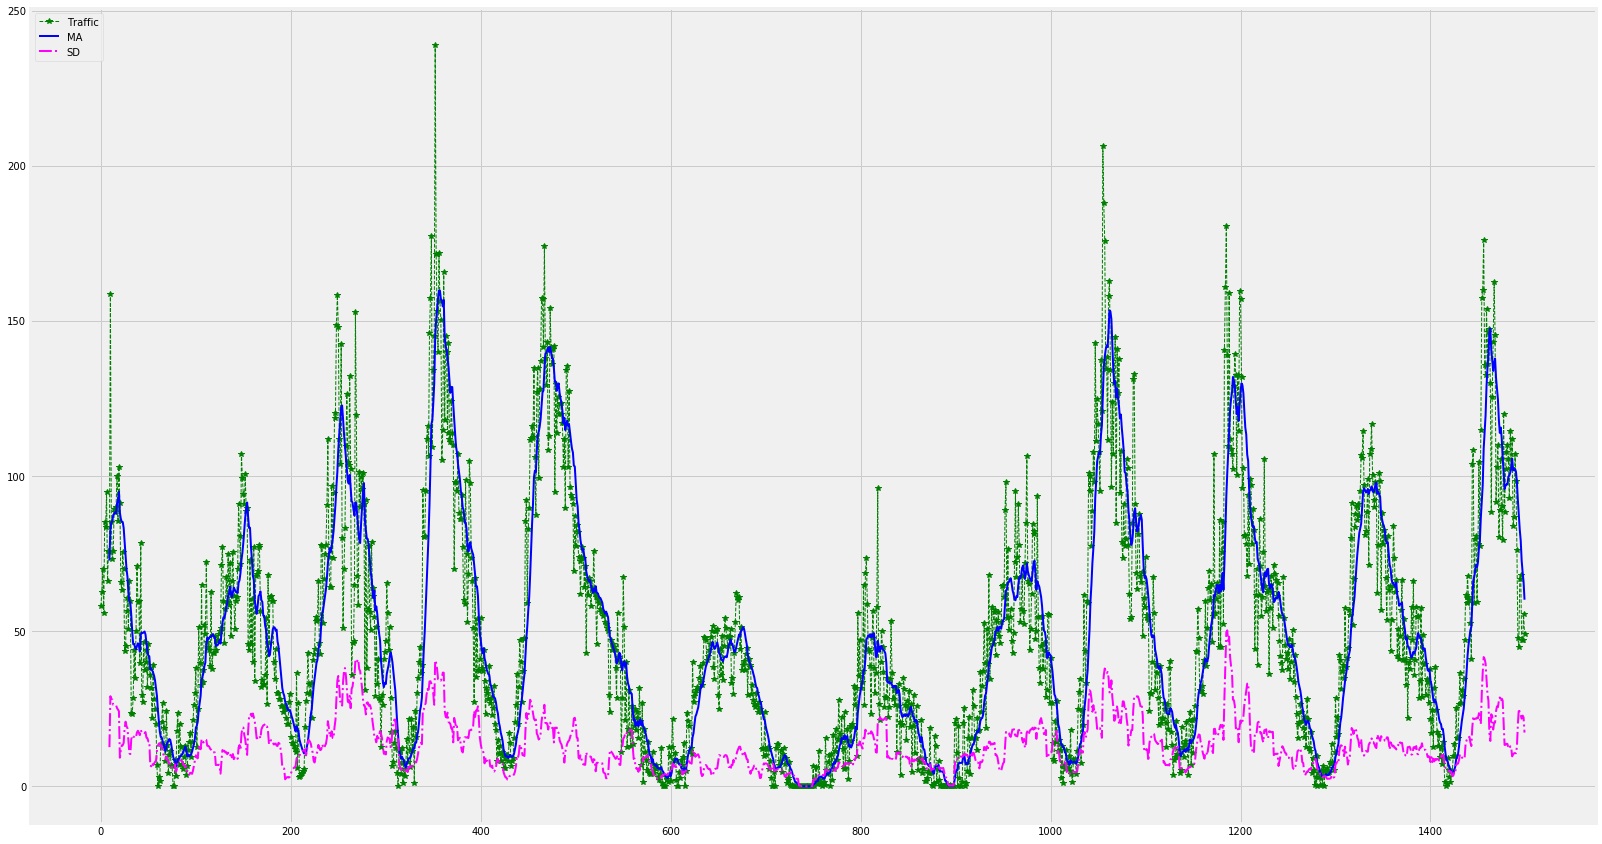

In [94]:
plt.figure(figsize=(25,15))
plt.grid(True)

plt.plot(df['SunSpots'], marker='*', label='Traffic', color='green', ls='dashed', linewidth=1)

plt.plot(df['MA_10'], label='MA', color='blue', linewidth=2)
plt.plot(df['SD_10'], label='SD', color='magenta', linewidth=2, ls='dashdot')

plt.legend(loc=2)

In [97]:
'''
#3 sigma rule
    https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule
    
# Mean (+/-) SD (standard deviation) * SIGMA
'''
# sigma = 1
df['LOW_1'] = df.MA_10 - df.SD_10 
df['HIGH_1'] = df.MA_10 + df.SD_10

# sigma = 2 
df['LOW_2'] = df.MA_10 - df.SD_10 * 2
df['HIGH_2'] = df.MA_10 + df.SD_10 * 2

# sigma = 3
df['LOW_3'] = df.MA_10 - df.SD_10 * 3
df['HIGH_3'] = df.MA_10 + df.SD_10 * 3

df.head(15)

,SunSpots,MA_10,SD_10,LOW_1,HIGH_1,LOW_2,HIGH_2,LOW_3,HIGH_3,Anomaly
0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,62.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,55.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
5,83.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
6,94.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
7,66.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8,75.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
9,75.5,72.73,12.604060,60.125940,85.334060,47.521880,97.938120,34.917819,110.542181,False


In [98]:
'''
# 1,2 Sigma outliers
df['Anomaly'] = (df.SunSpots >= df.HIGH_2) | \
                    (df.SunSpots <= df.LOW_2)  | \
                    (df.SunSpots >= df.HIGH_1) | \
                    (df.SunSpots <= df.LOW_1)
'''

# 2-SIGMA outliers
df['Anomaly'] = (df.SunSpots >= df.HIGH_2) | \
                    (df.SunSpots <= df.LOW_2)


#np.where(df['age']>=50, 'yes', 'no')
filt_spot = df.loc[df['Anomaly'] == True]
filt_spot.head(15)

,SunSpots,MA_10,SD_10,LOW_1,HIGH_1,LOW_2,HIGH_2,LOW_3,HIGH_3,Anomaly
10,158.6,82.79,29.010360,53.779640,111.800360,24.769280,140.810720,-4.241081,169.821081,True
32,23.5,55.16,15.140688,40.019312,70.300688,24.878623,85.441377,9.737935,100.582065,True
54,22.0,37.36,7.490765,29.869235,44.850765,22.378471,52.341529,14.887706,59.832294,True
80,17.8,6.85,5.451045,1.398955,12.301045,-4.052090,17.752090,-9.503134,23.203134,True
103,51.3,24.51,12.809671,11.700329,37.319671,-1.109342,50.129342,-13.919012,62.939012,True
106,64.7,34.15,15.144581,19.005419,49.294581,3.860838,64.439162,-11.283743,79.583743,True
127,71.3,49.34,8.215595,41.124405,57.555595,32.908810,65.771190,24.693215,73.986785,True
128,77.2,52.76,11.673731,41.086269,64.433731,29.412538,76.107462,17.738806,87.781194,True
145,91.0,65.55,12.491619,53.058381,78.041619,40.566761,90.533239,28.075142,103.024858,True
148,107.2,72.88,16.765626,56.114374,89.645626,39.348748,106.411252,22.583121,123.176879,True


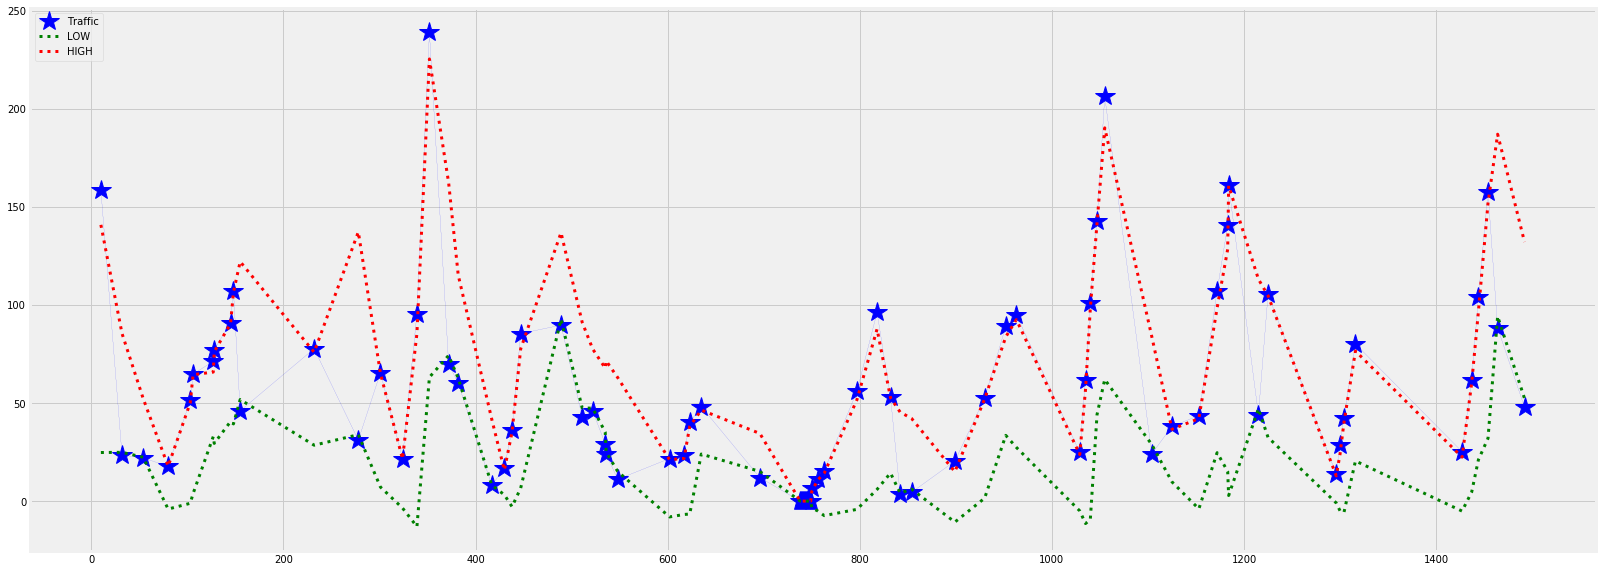

In [99]:
'''
=============    ===============================
    character        description
=============    ===============================
    ``'.'``          point marker
    ``','``          pixel marker
    ``'o'``          circle marker
    ``'v'``          triangle_down marker
    ``'^'``          triangle_up marker
    ``'*'``          star marker
    ``'+'``          plus marker
    ``'x'``          x marker
=============    ===============================
'''

plt.figure(figsize=(25,10))
plt.grid(True)
plt.plot(filt_spot['SunSpots'], marker='*', markersize=20, label='Traffic', color='blue', linewidth=0.1)

#plt.plot(filt_spot['LOW_1'], label='LOW', linewidth=2, ls='dotted')
#plt.plot(filt_spot['HIGH_1'], label='HIGH', linewidth=2, ls='dotted')

plt.plot(filt_spot['LOW_2'], label='LOW', color='green', linewidth=3, ls='dotted')
plt.plot(filt_spot['HIGH_2'], label='HIGH', color='red', linewidth=3, ls='dotted')

plt.legend(loc=2)